In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import plotly.graph_objs as go
import plotly.offline as pyo
PHI = np.pi

def ffts(s):
    s = s * np.hamming(len(s))
    S = fft.fft(s)
    S = fft.fftshift(S)
    return S

# 幅度谱归一化 连续
def norL(s):
    s = s / 2 * PHI  
    return s
# 幅度谱归一化 离散
def norD(s):
    s = s / len(s) 
    return s

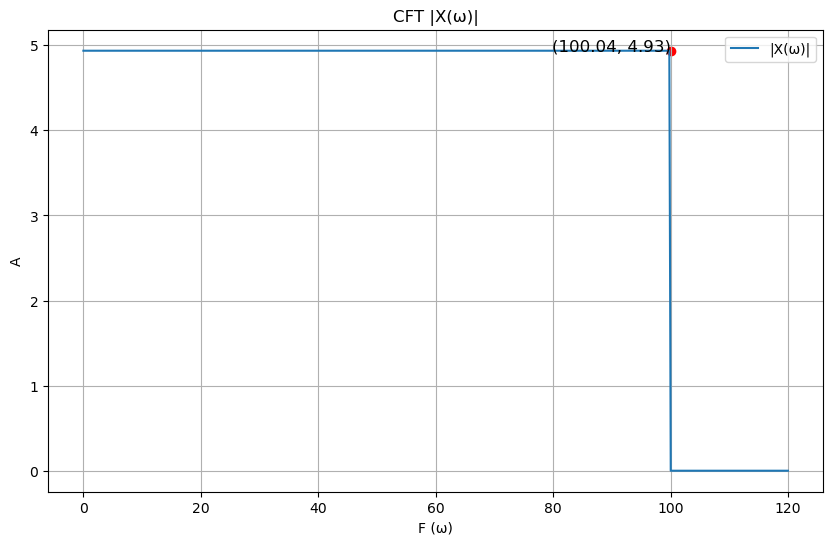

最大频率: 100.04
最大幅度: 4.93


In [2]:
# (1) - 1
# 常量Fh = 100HZ
Fh = 100

# 注册变量t
t = sp.symbols("t")

# 注册变量ω
w = sp.symbols("ω")

# 表达x(t)
x1 = sp.sin(2 * sp.pi * Fh * t) / t

# 做CFT运算
X1 = sp.fourier_transform(x1, t, w)

# 将傅里叶变换结果转换为可数值计算的函数
X1_func = sp.lambdify(w, X1, 'numpy')

# 生成频率范围
ω_vals = np.linspace(0, 120, 500)

# 计算傅里叶变换的数值结果
X_vals = X1_func(ω_vals)

# 归一化
X_vals = norL(X_vals)

# 找到峰值
peak_index = np.argmax(np.abs(X_vals))
peak_value = np.abs(X_vals[peak_index])
peak_index = np.argmin(np.abs(X_vals))
peak_freq = ω_vals[peak_index]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(ω_vals, np.abs(X_vals), label='|X(ω)|')
plt.scatter([peak_freq], [peak_value], color='red')  # 标记峰值
plt.text(peak_freq, peak_value, f'({peak_freq:.2f}, {peak_value:.2f})', fontsize=12, ha='right')
plt.xlabel('F (ω)')
plt.ylabel('A')
plt.title('CFT |X(ω)|')
plt.legend()
plt.grid(True)
plt.show()

# 打印峰值信息
print(f'最大频率: {peak_freq:.2f}')
print(f'最大幅度: {peak_value:.2f}')

## (1)-1
1.  带宽受限
2.  有最高频率Fh = 99.6Hz
3.  Fs = 99.6 * 2 = 199.2Hz

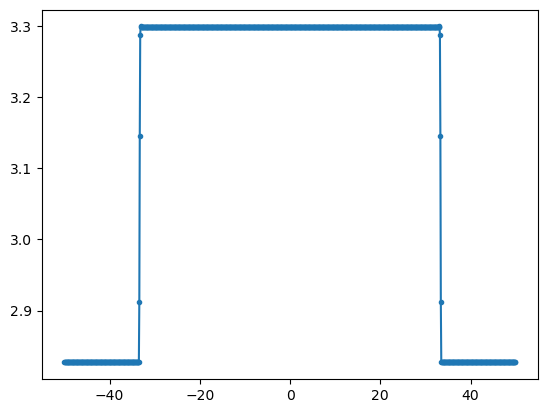

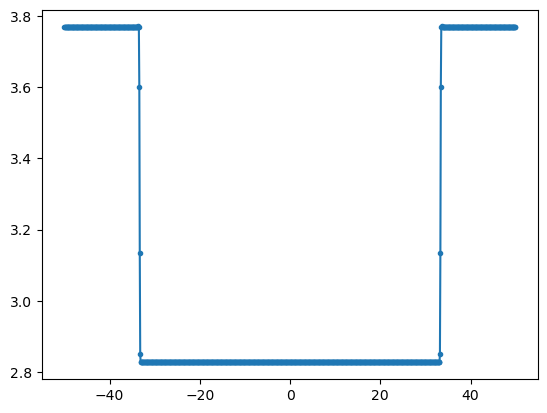

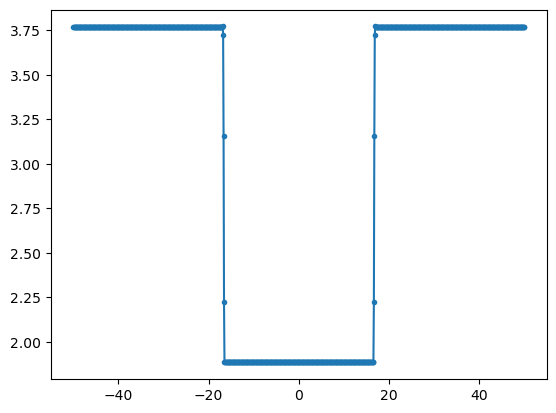

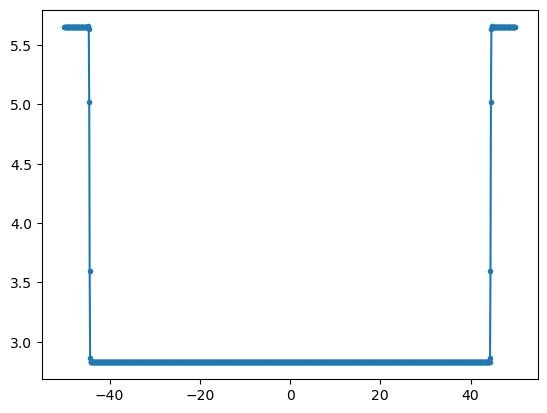

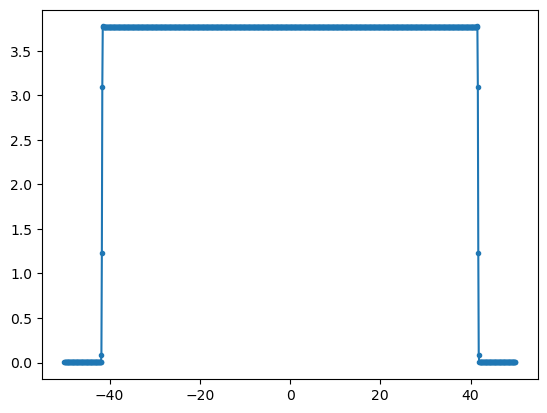

In [3]:
# (1) - 2
# 5个采样频率 0.3,0.6,1.2,1.8,2.4
F = [0.3 * Fh, 0.6 * Fh, 1.2 * Fh, 1.8 * Fh, 2.4 * Fh]
# x1_func = sp.lambdify(t, x1, "numpy")
Fh = 100
Th = 1 / Fh
N = 1000


def F_DTFT(F, index=0):  # 定义计算离散时间傅里叶变换（DTFT）的函数
    T = 1 / F  # 计算采样周期
    t = np.arange(-N // 2, N // 2) * T  # 生成时间序列
    s = np.sinc(2 * Fh * t) * PHI  # 生成信号
    S = ffts(s)  # 计算信号的傅里叶变换
    S_mag = np.abs(S)  # 计算傅里叶变换的幅值
    # 归一化
    # S_mag = norD(S_mag)
    S_phase = np.angle(S)  # 计算傅里叶变换的相位
    f = np.arange(Fh / -2, Fh / 2, Fh / (N))  # 生成频率序列
    plt.figure(index)  # 创建第一个图形窗口
    plt.plot(f, S_mag, ".-")  # 绘制幅值谱
    # plt.figure(index + 1)  # 创建第二个图形窗口
    # plt.plot(f, S_phase, ".-")  # 绘制相位谱


for index, (f) in enumerate(F):
    F_DTFT(f, 2 * index)

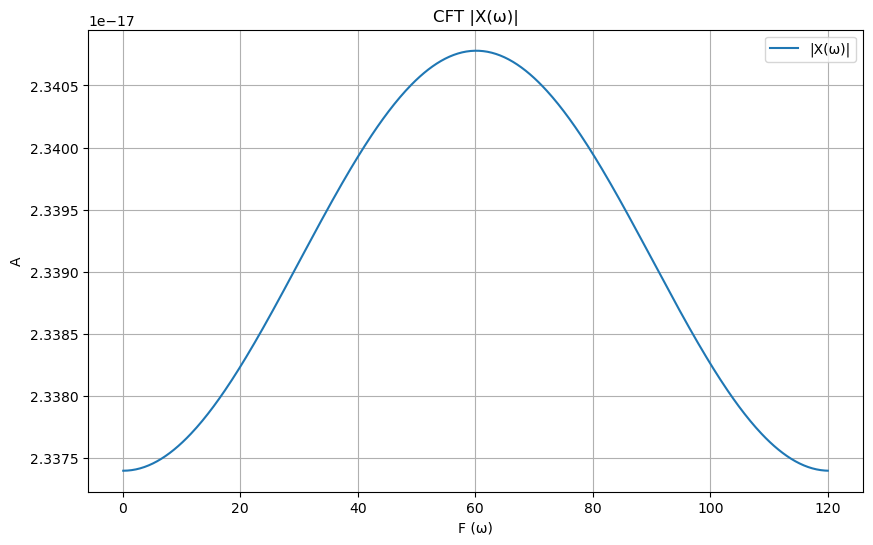

合适的采样频率: 89.60 Hz


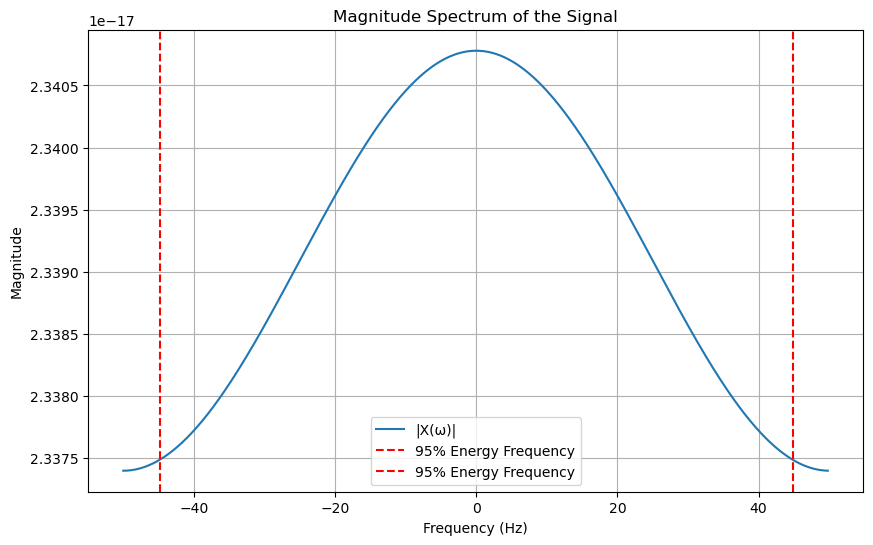

In [77]:
# (2) - 1
Fh = 100
Th = 1 / Fh
w2_vals = np.linspace(0.1, 120, 500)
x2_vals = np.sin(2 * PHI * Fh * w2_vals) * np.exp(-100 * w2_vals)
X2_vals = ffts(x2_vals)
X2_vals_abs = np.abs(X2_vals)

# 计算频率轴
freqs = np.fft.fftfreq(len(x2_vals), Th)
freqs = np.fft.fftshift(freqs)

plt.figure(figsize=(10, 6))
plt.plot(w2_vals, np.abs(X2_vals), label='|X(ω)|')
plt.xlabel('F (ω)')
plt.ylabel('A')
plt.title('CFT |X(ω)|')
plt.legend()
plt.grid(True)
plt.show()

# 计算频谱能量
E_s = np.abs(X2_vals) ** 2
E = np.sum(np.abs(X2_vals) ** 2)

# 计算累积能量
E_cum = np.cumsum(E_s)

# 找到能量超过总能量95%的频率
E_thr95 = 0.95 * E
index_95 = np.where(E_cum >= E_thr95)[0][0]
freq_95 = np.abs(freqs[index_95])

# 根据奎斯特定理计算最大频率
freq_sample = 2 * freq_95

# 打印结果
print(f"合适的采样频率: {freq_sample:.2f} Hz")

# 图
plt.figure(figsize=(10, 6))
plt.plot(freqs, X2_vals_abs, label='|X(ω)|')
plt.axvline(x=freq_95, color='r', linestyle='--', label="95% Energy Frequency")
plt.axvline(x=-freq_95, color='r', linestyle='--', label="95% Energy Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of the Signal")
plt.grid(True)
plt.legend()
plt.show()


## (2) - 1

1. 带宽无限
2. 有明显衰减
3. 合适的取样频率为 89.6Hz


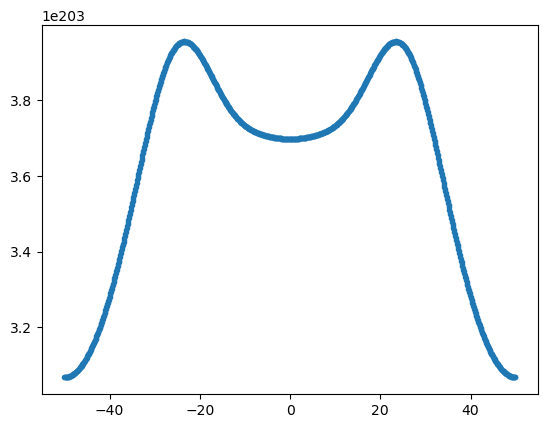

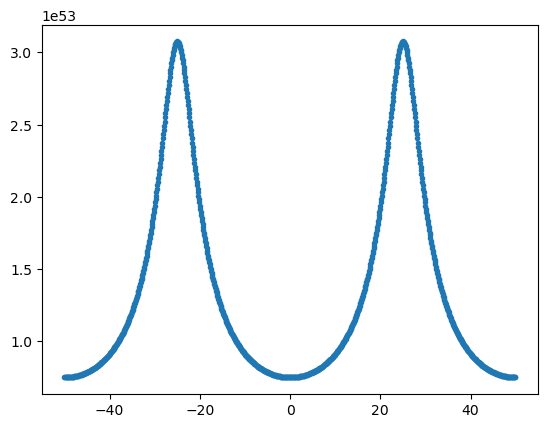

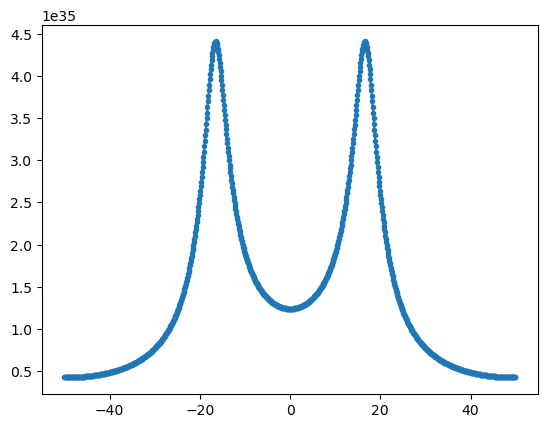

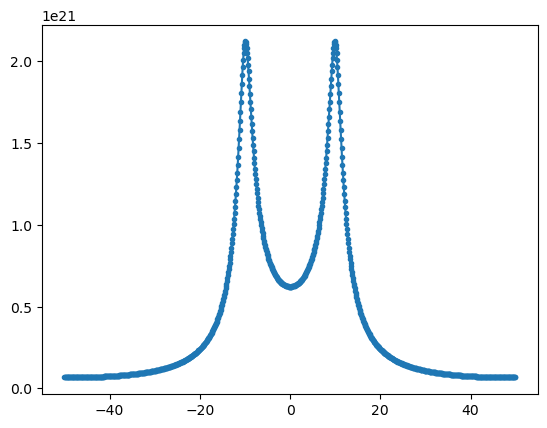

In [78]:
# (2) - 2
F = [Fh, 4 * Fh, 6 * Fh, 10 * Fh]

Fh = 100
Th = 1 / Fh
N = 1000


def F_DTFT(F, index=0):  # 定义计算离散时间傅里叶变换（DTFT）的函数
    T = 1 / F  # 计算采样周期
    t = np.arange(-N // 2, N // 2) * T  # 生成时间序列
    s = np.sin(2 * Fh * t * PHI) * np.exp(-100 * t)  # 生成信号
    S = ffts(s)  # 计算信号的傅里叶变换
    S_mag = np.abs(S)  # 计算傅里叶变换的幅值
    S_phase = np.angle(S)  # 计算傅里叶变换的相位
    f = np.arange(Fh / -2, Fh / 2, Fh / (N))  # 生成频率序列
    plt.figure(index)  # 创建第一个图形窗口
    plt.plot(f, S_mag, ".-")  # 绘制幅值谱
    # plt.figure(index + 1)  # 创建第二个图形窗口
    # plt.plot(f, S_phase, ".-")  # 绘制相位谱


for index, (f) in enumerate(F):
    F_DTFT(f, 2 * index)